In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
X = np.random.rand(50)
Y = 2*X+np.random.normal(0,0.1,50)

np.cov(X,Y)[0,1]

np.float64(0.17985178100345245)

In [12]:
X = np.random.rand(50)
Y = 2*X+4

print('Covarience of X and Y :\n'+str(np.cov(X,Y)))
print('Correlation of X and Y:\n' + str(np.corrcoef(X,Y)))

Covarience of X and Y :
[[0.0964171  0.19283421]
 [0.19283421 0.38566842]]
Correlation of X and Y:
[[1. 1.]
 [1. 1.]]


In [13]:
cov_matrix = np.cov(X,Y)

error = cov_matrix[0,0] - X.var(ddof=1) # X의 분산 가져와서 실제 함수로 계산한거랑 비교

print('error: '+ str(error))

error: -1.3877787807814457e-17


Correlation: -0.0696092265518603
Built - in Correlation:-0.06821704202082313


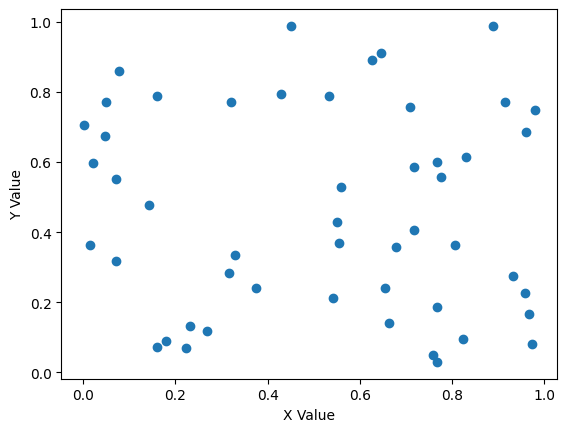

In [14]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
print('Built - in Correlation:' + str(np.corrcoef(X,Y)[0,1]))


Correlation: 0.9534960855409579


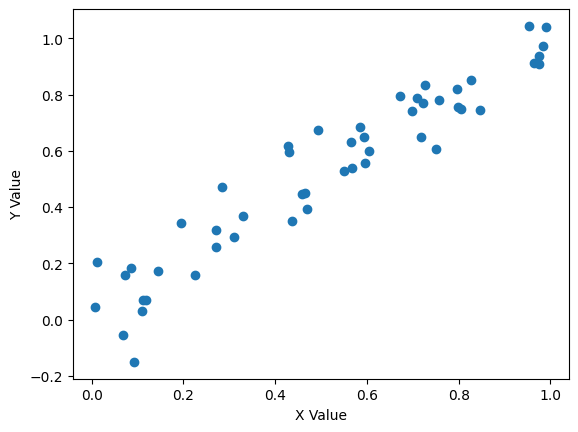

In [15]:
X = np.random.rand(50)
Y = X + np.random.normal(0,0.1,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '+ str(np.corrcoef(X,Y)[0,1]))

Correlation: 0.8449281829667382


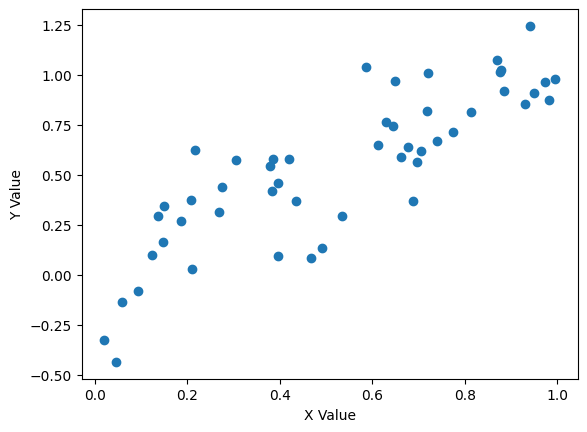

In [16]:
X = np.random.rand(50)
Y = X+np.random.normal(0,.2,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '  + str(np.corrcoef(X,Y)[0,1]))

Correlation: -0.9507613385360253


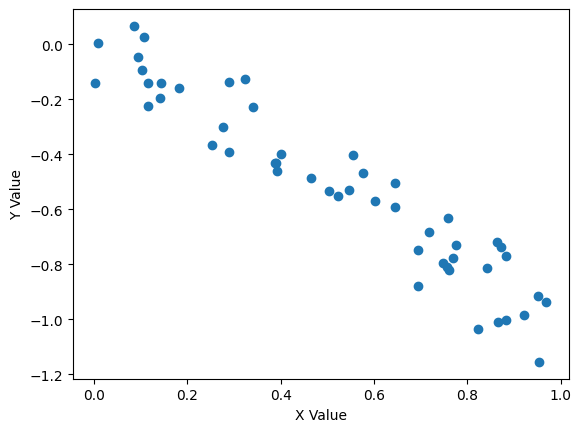

In [17]:
X = np.random.rand(50)
Y = -X + np.random.normal(0,.1,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '+ str(np.corrcoef(X,Y)[0,1]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation coefficients
LRCX and AAPL: 0.9595012047707696
LRCX and SPY: 0.9390677285162596
AAPL and SPY: 0.9078499410727643


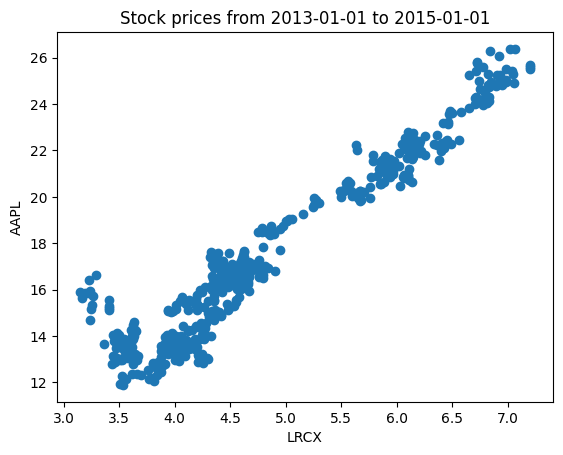

In [18]:
import yfinance as yf
start = '2013-01-01'
end = '2015-01-01'
data1 = yf.download('SPY',start=start,end=end,auto_adjust=True)
data2 = yf.download('LRCX',start=start,end=end,auto_adjust=True)
data3 = yf.download('AAPL',start=start,end=end,auto_adjust=True)

bench = data1['Close']['SPY']
a1 = data2['Close']['LRCX'] 
a2 = data3['Close']['AAPL'] 

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to '+end)
print('Correlation coefficients')
print('LRCX and AAPL:', np.corrcoef(a1,a2)[0,1])
print('LRCX and SPY:', np.corrcoef(a1,bench)[0,1])
print('AAPL and SPY:', np.corrcoef(bench,a2)[0,1])

Text(0, 0.5, '60-day Rolling Correlation')

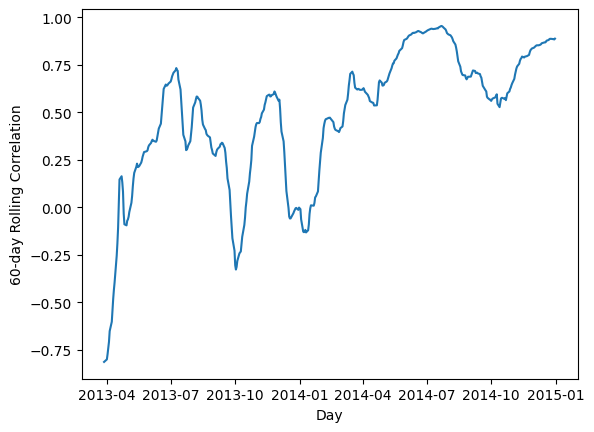

In [19]:
rolling_correlation = a1.rolling(window=60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

np.float64(0.322333694943186)

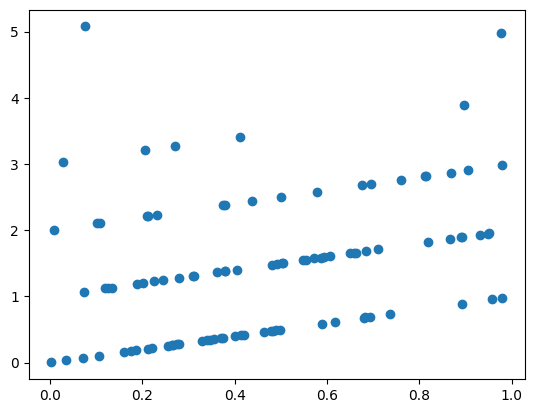

In [20]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X,Y)

np.corrcoef(X,Y)[0,1]

In [21]:
import scipy.stats as stats
import math

In [22]:
l = [10,9,5,7,5]
print('Raw data:',l)
print('Ranking: ', list(stats.rankdata(l,method="average")))

Raw data: [10, 9, 5, 7, 5]
Ranking:  [np.float64(5.0), np.float64(4.0), np.float64(1.5), np.float64(3.0), np.float64(1.5)]


In [23]:
n = 100

def compare_correlation_and_spearman_rank(n):
    X = np.random.poisson(size=n)
    Y = np.exp(X) + np.random.poisson(size=n)

    Xrank = stats.rankdata(X,method='average')
    Yrank = stats.rankdata(Y,method='average')

    diffs = Xrank - Yrank
    r_s= 1 - 6*sum(diffs*diffs)/(n*(n**2-1))
    c_c=np.corrcoef(X,Y)[0,1]

    return r_s,c_c

experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)
for i in range(experiments):
    r_s,c_c = compare_correlation_and_spearman_rank(n)
    spearman_dist[i] = r_s
    correlation_dist[i] = c_c

print('Spearman Rank Coefficient: ' + str(np.mean(spearman_dist)))
print('Correlation coefficient: ' + str(np.mean(correlation_dist)))

Spearman Rank Coefficient: 0.8732097329732974
Correlation coefficient: 0.7727295315313306


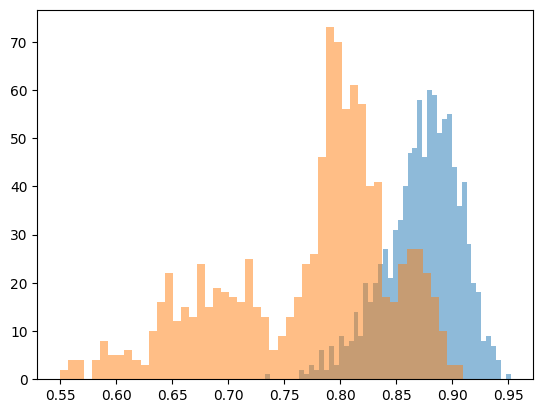

In [32]:
plt.hist(spearman_dist,bins=50,alpha = 0.5)
plt.hist(correlation_dist,bins=50,alpha = 0.5)
print("")

# 상관관계 분석이 실패하는 또 다른 경우: 시차(Lag) 문제

Text(0, 0.5, 'Value')

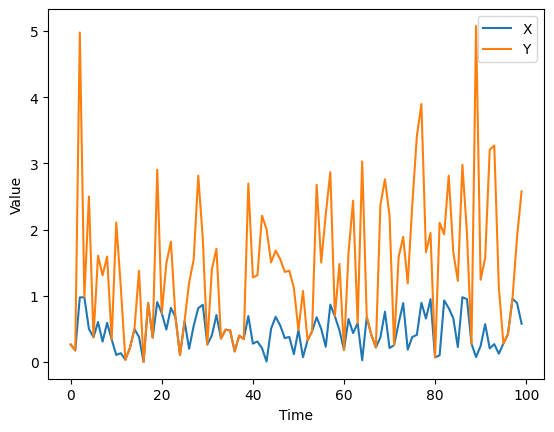

In [25]:
plt.plot(X)
plt.plot(Y)
plt.legend(['X','Y'])
plt.xlabel('Time')
plt.ylabel('Value')

In [26]:
n = 100

X = np.random.rand(n)
Xrank = stats.rankdata(X,method = 'average')

Yrank = stats.rankdata([1,1] + list(X[:(n-2)]),method='average')

diffs = Xrank - Yrank
r_s = 1 - 6*sum(diffs*diffs)/(n*(n**2-1))
print(r_s)

-0.07371437143714377


In [27]:
np.random.seed(161)
X=np.random.rand(10)
Y = np.random.rand(10)

r_s = stats.spearmanr(X,Y)
print('Spearman Rank cofficient: ', r_s[0])
print('p-value: ', r_s[1])

Spearman Rank cofficient:  0.23636363636363633
p-value:  0.5108853175152002


## 뮤추얼 펀드의 운용보수(Expense Ratio) 대 샤프 비율(Sharpe Ratio)에 대한 스피어만 랭크 상관관계를 테스트

Spearman Rank coefficient:  -0.3696969696969697
p-value:  0.2930500752928223


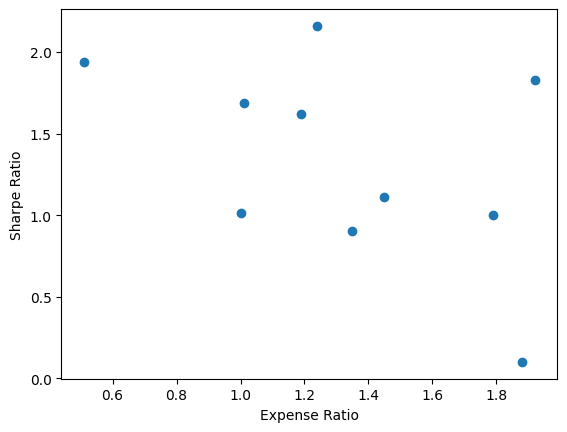

In [28]:
expense = [1.35,1.79,1.45,1.88,1.,1.01,1.19,1.92,0.51,1.24]
sharpe = [0.9,1.,1.11,0.1,1.01,1.69,1.62,1.83,1.94,2.16]

plt.scatter(expense,sharpe)
plt.xlabel('Expense Ratio')
plt.ylabel('Sharpe Ratio')

r_S = stats.spearmanr(expense,sharpe)
print('Spearman Rank coefficient: ',r_S[0])
print('p-value: ',r_S[1])

## 롱숏 주식 전략과 모멘텀 검증

[*********************100%***********************]  13 of 13 completed


--- [Step 1] Our Strategy Scores (Last Month Mean Returns) ---
Ticker
GOOGL    0.007039
AVGO     0.006432
INTC     0.002182
AAPL     0.002088
META     0.001043
SPY      0.000051
QQQ     -0.001044
SOXX    -0.001790
MSFT    -0.002558
TSLA    -0.004186
AMZN    -0.004549
NVDA    -0.008285
AMD     -0.008819
dtype: float64


--- [Step 2] Actual Forward Returns (Next Month) ---
Ticker
TSLA     0.003041
NVDA     0.002256
META     0.002049
SOXX     0.001569
SPY      0.000654
QQQ      0.000280
MSFT     0.000135
GOOGL   -0.000039
AMZN    -0.000232
AMD     -0.000756
AAPL    -0.001778
INTC    -0.003024
AVGO    -0.004246
dtype: float64


Correlation Coefficient: -0.42857142857142855
P-value: 0.14397143468783608


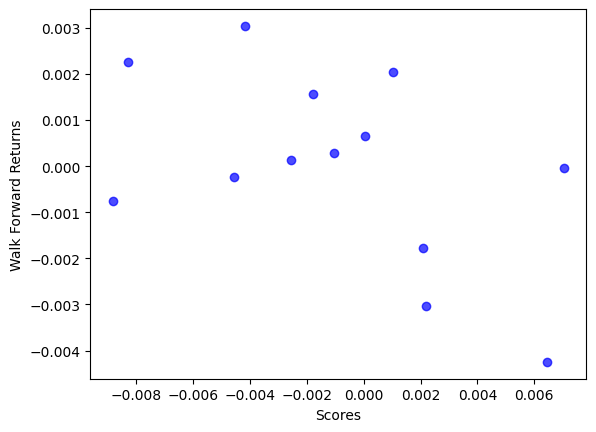

In [39]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

# 1. 대상 종목 리스트 (최신 테크 및 반도체 위주)
symbol_list = [
    'AAPL', 'MSFT', 'NVDA', 'TSLA', 'GOOGL', 
    'AMZN', 'META', 'AMD', 'AVGO', 'INTC',     
    'SPY', 'QQQ', 'SOXX'                  
]

# 2. 데이터 수집 기간 설정 (최근 데이터로 변경)
# 2025년 11월 수익률로 12월 수익률을 예측하는 모델 검증
lookback_start, lookback_end = '2025-11-01', '2025-11-30'
forward_start, forward_end = '2025-12-01', '2025-12-31'

# 데이터 다운로드
data = yf.download(symbol_list, start=lookback_start, end=forward_end,auto_adjust=True)['Close']

# 3. 과거 수익률 점수 계산 (Lookback Window)
historical_prices = data.loc[lookback_start:lookback_end]
historical_returns = historical_prices.pct_change().dropna()
scores = historical_returns.mean()

print("--- [Step 1] Our Strategy Scores (Last Month Mean Returns) ---")
print(scores.sort_values(ascending=False))
print('\n')

# 4. 미래 실제 수익률 계산 (Walk Forward Window)
forward_prices = data.loc[forward_start:forward_end]
forward_returns_actual = forward_prices.pct_change().dropna()
walk_forward_returns = forward_returns_actual.mean()

print("--- [Step 2] Actual Forward Returns (Next Month) ---")
print(walk_forward_returns.sort_values(ascending=False))
print('\n')

# 5. 상관관계 분석 및 시각화
plt.scatter(scores, walk_forward_returns, color='blue', alpha=0.7);
plt.xlabel('Scores')
plt.ylabel('Walk Forward Returns')

# 스피어만 상관계수 계산
r_s = stats.spearmanr(scores, walk_forward_returns)
print(f"Correlation Coefficient: {str(r_s[0])}")
print(f"P-value: {str(r_s[1])}")